In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import h5py
import time
from tqdm import tqdm
from keras.models import load_model

In [48]:
root_path = '../../datasets/image_text/'
data_path = root_path + 'preprocessed_data/'
image_path='/home/eric/data/social_images/'
model_filename = './trained_models/image_text/hashtag_weights.53-3.2345.hdf5'
model = load_model(model_filename)
data_logs = np.genfromtxt(data_path + 'data_parameters.log',
                                  delimiter=' ', dtype='str')
data_logs = dict(zip(data_logs[:, 0], data_logs[:, 1]))

In [49]:
print(data_logs)

{'data_filename': '../../datasets/image_text/image_text_data.txt', 'dump_path': '../../datasets/image_text/preprocessed_data/', 'BOS:': '<S>', 'EOS:': '<E>', 'PAD:': '<P>', 'IMG_FEATS:': '2048', 'word_frequency_threshold:': '2', 'max_caption_length:': '20', 'initial_data_size:': '57177', 'captions_larger_than_threshold:': '11399', 'current_data_size:': '45778', 'initial_word_size:': '998', 'words_removed_by_frequency_threshold': '1', 'current_word_size:': '997', 'cnn_extractor:': 'inception', 'elapsed_time:': '0.7172187010000926'}


In [50]:
BOS = str(data_logs['BOS:'])
EOS = str(data_logs['EOS:'])
IMG_FEATS = int(data_logs['IMG_FEATS:'])
MAX_TOKEN_LENGTH = int(data_logs['max_caption_length:']) + 2

In [51]:
test_data_filename='validation_data.txt'
word_to_id_filename='word_to_id.p'
id_to_word_filename='id_to_word.p'
image_name_to_features_filename='inception_image_name_to_features.h5'
test_data = pd.read_table(data_path +test_data_filename, sep='*')
word_to_id = pickle.load(open(data_path +word_to_id_filename, 'rb'))
id_to_word = pickle.load(open(data_path +id_to_word_filename, 'rb'))
VOCABULARY_SIZE = len(word_to_id)
image_names_to_features = h5py.File(data_path +
                                        image_name_to_features_filename)

In [52]:
print(word_to_id)

{'<P>': 0, '<S>': 1, '<E>': 2, 'love': 3, 'instagood': 4, 'christmas': 5, 'photography': 6, 'art': 7, 'photooftheday': 8, 'fashion': 9, 'fitness': 10, 'picoftheday': 11, 'beautiful': 12, 'travel': 13, 'instagram': 14, 'happy': 15, 'food': 16, 'style': 17, 'nature': 18, 'cute': 19, 'motivation': 20, 'beauty': 21, 'family': 22, 'follow': 23, 'inspiration': 24, 'foodporn': 25, 'instadaily': 26, 'life': 27, 'lifestyle': 28, 'drawing': 29, 'workout': 30, 'photo': 31, 'music': 32, 'design': 33, 'fun': 34, 'foodie': 35, 'followme': 36, 'instafood': 37, 'gym': 38, 'healthy': 39, 'model': 40, 'newyear': 41, 'fit': 42, 'repost': 43, 'holiday': 44, 'instapic': 45, 'makeup': 46, 'artist': 47, 'merrychristmas': 48, 'handmade': 49, 'yummy': 50, 'baby': 51, 'smile': 52, 'friends': 53, 'vsco': 54, 'selfie': 55, 'ootd': 56, 'likelike': 57, 'home': 58, 'beach': 59, 'girl': 60, 'winter': 61, 'me': 62, 'instalike': 63, 'wedding': 64, 'amazing': 65, 'london': 66, 'likeforlike': 67, 'followforfollow': 68, '

tokenize the whole datasets

In [53]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words=5000
complete_filename = data_path + 'complete_data.txt'
print('Loading all tweet dataset...')
complete_dataset = pd.read_table(complete_filename,delimiter='*')
complete_dataset = np.asarray(complete_dataset, dtype=str)
tweets=complete_dataset[:,1]
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(tweets)

Loading all tweet dataset...


In [54]:
print(test_data[:2])
print(test_data.sample(1))

                                 image_names  \
0     dataset/me/2018-12-27_12-09-43_UTC.jpg   
1  dataset/night/2018-12-25_09-01-10_UTC.jpg   

                                              tweets  \
0                                       current mood   
1  follow page like and comment tag your hd pics ...   

                                            hashtags  
0  blackandwhite me girl home polishgirl mood sel...  
1  repost love instagood tbt toptags cute clouds ...  
                                   image_names                    tweets  \
3024  dataset/baby/2018-12-25_07-47-42_UTC.jpg  merry christmas everyone   

                                               hashtags  
3024  fall love baby hot meme likeforlike ll followf...  


In [55]:
line=np.array(test_data.sample(1))
print(line)
image_name = line[0][0]
tweets=line[0][1]


[['dataset/instacool/2018-11-15_05-59-05_UTC.jpg'
  'never run back to what broke you' 'photoshoot instacool']]


In [56]:
print(image_name)
print(tweets)

dataset/instacool/2018-11-15_05-59-05_UTC.jpg
never run back to what broke you


In [57]:
tweet_max_len=80 
tweets=[tweets]
sequences = tokenizer.texts_to_sequences(tweets)
tweet_vec=pad_sequences(sequences, maxlen=tweet_max_len)
print(tweet_vec)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  117  451   54    2   35 1925    5]]


In [58]:
features = image_names_to_features[image_name]['image_features'][:]
print(features)

[0.0882339  0.18938659 0.18628289 ... 0.5461445  0.86437744 0.26644805]


In [59]:
text = np.zeros((1, MAX_TOKEN_LENGTH, VOCABULARY_SIZE))
print(text)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [60]:
begin_token_id = word_to_id[BOS]
text[0, 0, begin_token_id] = 1

In [64]:
image_features = np.zeros((1, MAX_TOKEN_LENGTH, IMG_FEATS))
# image_features[0, 0, :] = features
for i in range(MAX_TOKEN_LENGTH):
    image_features[0,i,:] =  features
print(image_features)

[[[0.0882339  0.18938659 0.18628289 ... 0.54614449 0.86437744 0.26644805]
  [0.0882339  0.18938659 0.18628289 ... 0.54614449 0.86437744 0.26644805]
  [0.0882339  0.18938659 0.18628289 ... 0.54614449 0.86437744 0.26644805]
  ...
  [0.0882339  0.18938659 0.18628289 ... 0.54614449 0.86437744 0.26644805]
  [0.0882339  0.18938659 0.18628289 ... 0.54614449 0.86437744 0.26644805]
  [0.0882339  0.18938659 0.18628289 ... 0.54614449 0.86437744 0.26644805]]]


my christmas new me follow 
[947, 5, 195, 62, 23]


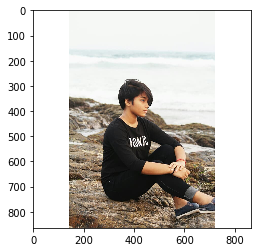

In [65]:
list_word_id=[]
num=0
for word_arg in range(MAX_TOKEN_LENGTH - 1):
    predictions = model.predict([text, image_features,tweet_vec])
    matrix=np.argsort(predictions[0, word_arg, :])
    word_id=0
    word_id=matrix[-1]
    for id in reversed(matrix):
        if id not in list_word_id:
            target_word_id=id
            list_word_id.append(id)
            break
      
    next_word_arg = word_arg + 1
    text[0, next_word_arg, target_word_id] = 1
    word = id_to_word[target_word_id]
    print(word,end=" ")
    num+=1
    if word == EOS:
        break
    elif(num==5):
        break
print()
print(list_word_id)
plt.imshow(plt.imread(image_path + image_name))
plt.show()

In [66]:
dump_filename ='predicted_hashtags.txt'

predicted_captions = open(dump_filename, 'w')
image_names = test_data['image_names'].tolist()
tweet_list=test_data['tweets'].tolist()
count=0
tweet_max_len=80 
for image_arg,image_name in tqdm(enumerate(image_names)):
    count+=1
    tweet=str(tweet_list[image_arg])  # nan bug
    print(tweet)
    sequences = tokenizer.texts_to_sequences([tweet])
    tweet_vec=pad_sequences(sequences, maxlen=tweet_max_len)

    features = image_names_to_features[image_name]\
                                            ['image_features'][:]
    text = np.zeros((1, MAX_TOKEN_LENGTH, VOCABULARY_SIZE))
    begin_token_id = word_to_id[BOS]
    text[0, 0, begin_token_id] = 1
    image_features = np.zeros((1,MAX_TOKEN_LENGTH,
                                                IMG_FEATS))
    image_features[0, 0, :] = features
    neural_caption = []
    num=0
    list_word_id=[]
    for word_arg in range(MAX_TOKEN_LENGTH-1):
        predictions = model.predict([text, image_features,tweet_vec])
        matrix=np.argsort(predictions[0, word_arg, :])
        word_id=0
        word_id=matrix[-1]
        for id in reversed(matrix):
            if id not in list_word_id:
                target_word_id=id
                list_word_id.append(id)
                break                
        next_word_arg = word_arg + 1
        text[0, next_word_arg, target_word_id] = 1
        word = id_to_word[target_word_id]
        num+=1
        if word == '<E>':
            break
        elif(num==6):
            break
        else:
            neural_caption.append(word)
    neural_caption = ' '.join(neural_caption)
    predicted_captions.write(neural_caption+'\n')
predicted_captions.close()
target_captions = test_data['caption']
target_captions.to_csv('target_captions.txt',
                               header=False, index=False)

0it [00:00, ?it/s]

current mood


NameError: name 'self' is not defined